In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv('./data/1000_records.csv')
df.head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh


Observations:

1. There are so many columns which will not be very useful for the model. Those will be removed.
2. There are categorical as well as numeric variables


In [3]:
df.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

Observations:
  The following columns may not contribute to the model. So will be dropped.
  
 ['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name','E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth','Weight in Kgs.', 'Date of Joining','Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'SSN', 'Phone No. ', 'User Name', 'Password']
       
Further investigation will be done on the remaining columns in the dataset.

In [4]:
data = df.drop(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name','E Mail', "Father's Name", "Mother's Name", "Mother's Maiden Name", 'Date of Birth', 'Time of Birth','Weight in Kgs.', 'Date of Joining','Month of Joining', 'Month Name of Joining', 'Short Month', 'Day of Joining', 'DOW of Joining', 'Short DOW', 'SSN', 'Phone No. ', 'User Name', 'Password'], axis=1)
data.head()

,Gender,Age in Yrs.,Quarter of Joining,Half of Joining,Year of Joining,Age in Company (Years),Salary,Last % Hike,Place Name,County,City,State,Zip,Region
0,F,45.66,Q4,H2,2010,6.61,119090,17%,Las Vegas,Clark,Las Vegas,NV,89128,West
1,M,23.76,Q2,H1,2017,0.26,117991,14%,Irons,Lake,Irons,MI,49644,Midwest
2,F,22.68,Q1,H1,2017,0.34,161045,28%,Lexington,Fayette,Lexington,KY,40501,South
3,F,41.70,Q1,H1,2003,14.43,142616,16%,Munster,Lake,Munster,IN,46321,Midwest
4,F,22.39,Q4,H2,2016,0.79,135706,11%,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West


Pushing the target variable to the end

In [5]:
target = data['Salary']
data.drop(labels=['Salary'], axis=1, inplace = True)
data.insert(13, 'Salary', target)
data.head()

,Gender,Age in Yrs.,Quarter of Joining,Half of Joining,Year of Joining,Age in Company (Years),Last % Hike,Place Name,County,City,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17%,Las Vegas,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14%,Irons,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28%,Lexington,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16%,Munster,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11%,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,135706


In [6]:
data.columns


Index(['Gender', 'Age in Yrs.', 'Quarter of Joining', 'Half of Joining',
       'Year of Joining', 'Age in Company (Years)', 'Last % Hike',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'Salary'],
      dtype='object')

In [7]:
#Renaming the columns
data.rename(columns={'Age in Yrs.':'Age', 'Quarter of Joining':'Joining_quarter', 'Half of Joining':'Joining_half' ,
       'Year of Joining':'Joining_year', 'Age in Company (Years)':'Experience', 'Last % Hike':'Last_hike',
       'Place Name':'Place_name'}, inplace=True)

In [8]:
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,Place_name,County,City,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17%,Las Vegas,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14%,Irons,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28%,Lexington,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16%,Munster,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11%,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,135706


Observations:

1. It looks like Place_name and City both have the same values. So dropping Place_name
2. The Joining_year and the Experience variables might also act alike since they both answer the same question "Since when/how long has this employee been assosiated with the company". But I would like to look at the correlation between these variables before deciding if I need to drop one of them.

In [9]:
data.drop(['Place_name'], axis=1, inplace = True)

In [10]:
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,County,City,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17%,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14%,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28%,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16%,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11%,Fairbanks North Star,Fairbanks,AK,99709,West,135706


Observations:

1. The Last_hike variable needs data clean-up. Remove '%' from the values and convert the values into proportions.
2. There are categorical variables available in the dataset. If we are going to use them, we'll have to do encoding. ['Gender', 'Joining_quarter', 'Joining_half', 'Joining_year','County', 'City', 'State',
 'Zip', 'Region']

In [20]:
data.shape

(1000, 13)

Observations:

1.There are 1000 rows and 13 columns.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1000 non-null   object 
 1   Age              1000 non-null   float64
 2   Joining_quarter  1000 non-null   object 
 3   Joining_half     1000 non-null   object 
 4   Joining_year     1000 non-null   int64  
 5   Experience       1000 non-null   float64
 6   Last_hike        1000 non-null   object 
 7   County           1000 non-null   object 
 8   City             1000 non-null   object 
 9   State            1000 non-null   object 
 10  Zip              1000 non-null   int64  
 11  Region           1000 non-null   object 
 12  Salary           1000 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 101.7+ KB


Observations:

Although Joining_year and Zip are integers, these variables can be used to group the data.

In [12]:
data.describe()

,Age,Joining_year,Experience,Zip,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.377250,2006.992000,10.093720,48698.499000,120288.528000
std,11.107729,8.565588,8.568863,27396.021481,45178.339916
min,21.040000,1980.000000,0.000000,1002.000000,40040.000000
25%,30.925000,2002.000000,3.152500,25421.750000,82122.000000
50%,40.730000,2009.000000,7.815000,47416.500000,119409.000000
75%,49.852500,2014.000000,15.465000,71101.000000,159109.000000
max,59.980000,2017.000000,37.570000,99791.000000,199943.000000


Observations:

1. The Experience variable seem to be slightly skewed.
2. The other variables seem to be close to normal distribution.

In [13]:
data.columns

Index(['Gender', 'Age', 'Joining_quarter', 'Joining_half', 'Joining_year',
       'Experience', 'Last_hike', 'County', 'City', 'State', 'Zip', 'Region',
       'Salary'],
      dtype='object')

In [24]:
data.select_dtypes(include = 'object').describe()

,Gender,Joining_quarter,Joining_half,Last_hike,County,City,State,Region
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,4,2,31,582,880,50,4
top,M,Q2,H1,16%,Jefferson,Saint Louis,PA,South
freq,509,276,519,45,15,5,62,371


Observations:

1. There are more than 100 categories in 'County ' and 'City'. This will create more features when we do encoding.
2. Since we already have 'State' and 'Region' to represent geographical details, we can safely drop 'County' and 'City'.
3. There are slightly more Male employees that Female employees.
4. Slightly more number of employees joined in the 1st half of the years than the 2nd half. Particularly in the 2nd Quarter.
5. A good number of employees are from the South region and from PA.

In [25]:
data.drop(['County','City'], axis=1,inplace=True)
data.head(2)

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17%,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14%,MI,49644,Midwest,117991


In [26]:
data.isnull().sum()

Gender             0
Age                0
Joining_quarter    0
Joining_half       0
Joining_year       0
Experience         0
Last_hike          0
State              0
Zip                0
Region             0
Salary             0
dtype: int64

Observations:

There are no missing values in the dataset.

### Data Cleaning

In [27]:
data['Last_hike'] = data['Last_hike'].apply(lambda x: x.strip('%')).astype('int64')
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11,AK,99709,West,135706


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1000 non-null   object 
 1   Age              1000 non-null   float64
 2   Joining_quarter  1000 non-null   object 
 3   Joining_half     1000 non-null   object 
 4   Joining_year     1000 non-null   int64  
 5   Experience       1000 non-null   float64
 6   Last_hike        1000 non-null   int64  
 7   State            1000 non-null   object 
 8   Zip              1000 non-null   int64  
 9   Region           1000 non-null   object 
 10  Salary           1000 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB


### Univariate analysis

In [63]:
data.Last_hike.unique()

array([17, 14, 28, 16, 11,  4, 13,  1, 20, 21, 24, 15, 22, 19,  3,  5,  6,
       26, 30, 10,  9, 25, 18,  2,  8, 12,  0, 29, 27,  7, 23],
      dtype=int64)

Observations:

1. There are 31 unique values in Last_hike variable.
2. It would make sense to see the hikes in range of '0 to 09', '10 to 19' and '20 to 30' groups.

In [149]:
data['hikes'] = data['Last_hike'].apply(lambda x : 'o to 9' if x < 10 else ('10 to 19' if x < 20 else '20 to 30'))
#data['hikes'] = data['Last_hike'].apply(lambda x : 1 if x < 15 else 0)
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,State,Zip,Region,Salary,hikes
0,F,45.66,Q4,H2,2010,6.61,17,NV,89128,West,119090,10 to 19
1,M,23.76,Q2,H1,2017,0.26,14,MI,49644,Midwest,117991,10 to 19
2,F,22.68,Q1,H1,2017,0.34,28,KY,40501,South,161045,20 to 30
3,F,41.70,Q1,H1,2003,14.43,16,IN,46321,Midwest,142616,10 to 19
4,F,22.39,Q4,H2,2016,0.79,11,AK,99709,West,135706,10 to 19


Categorical variables

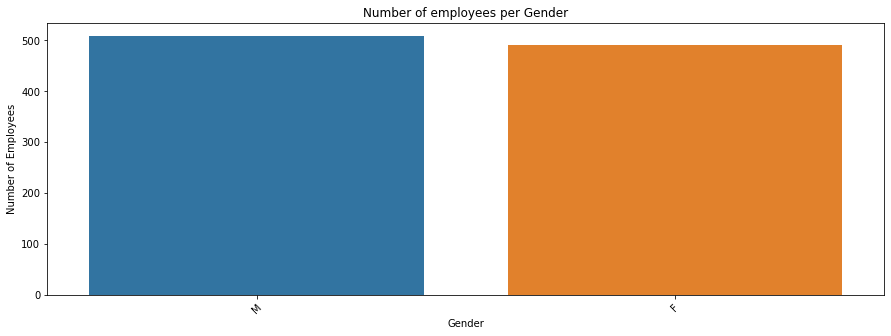

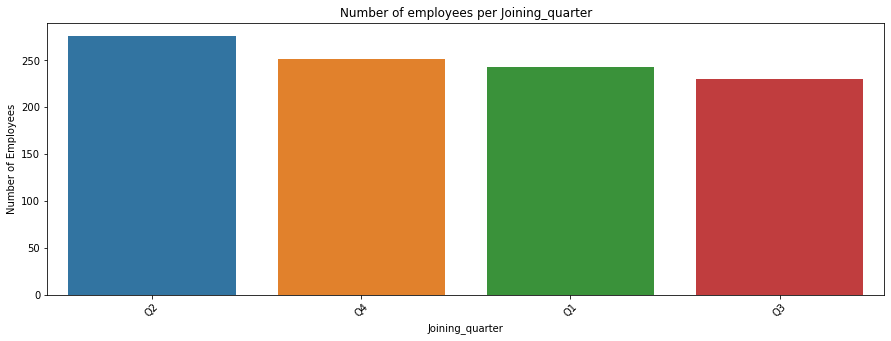

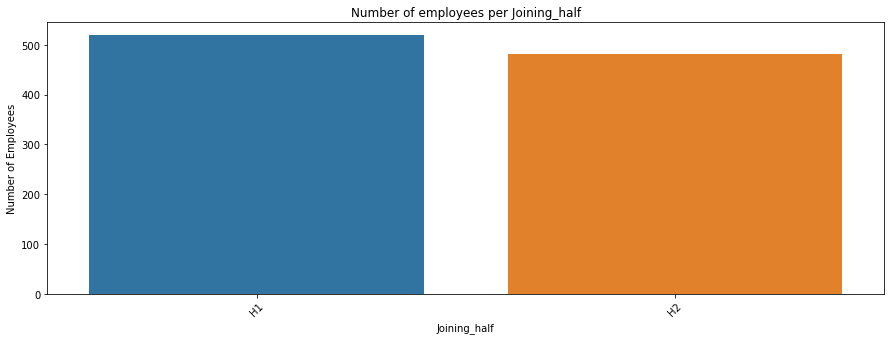

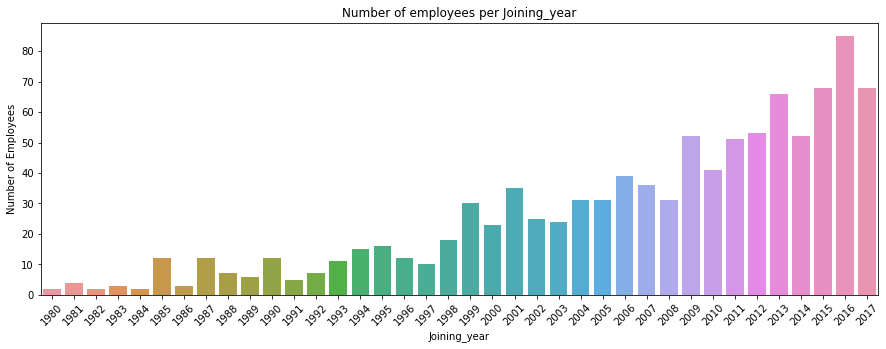

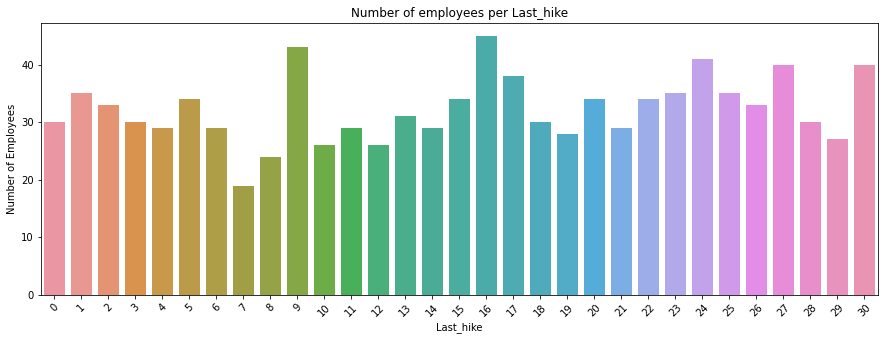

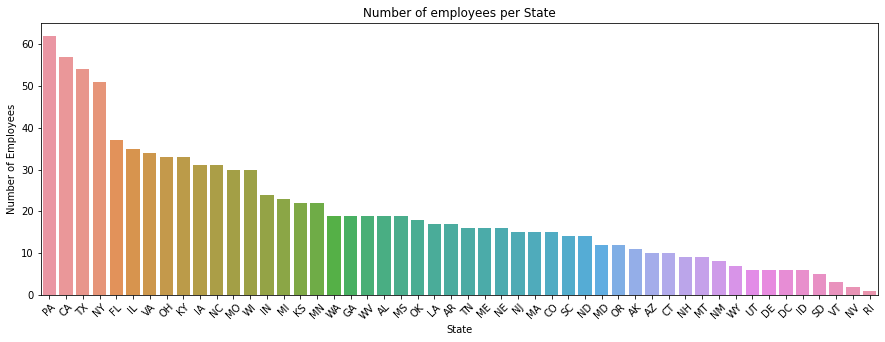

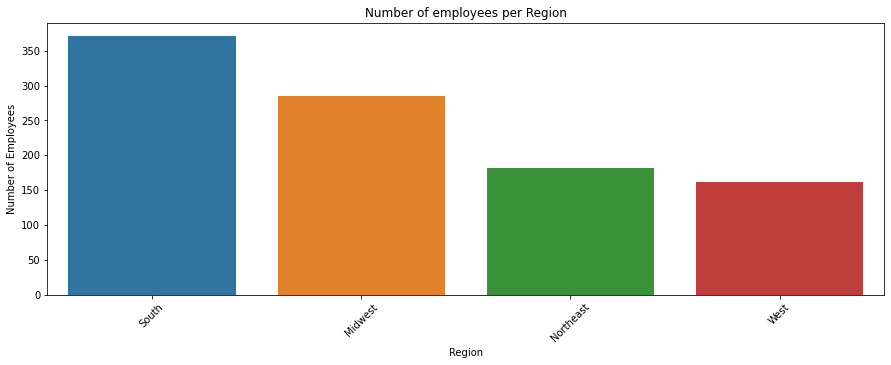

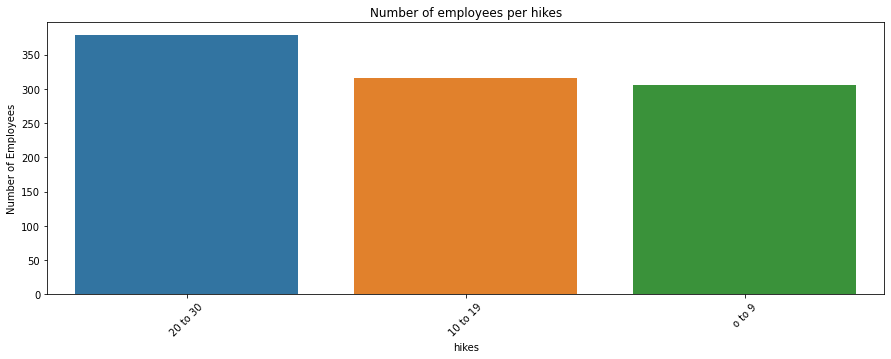

In [151]:
cols = ['Gender', 'Joining_quarter', 'Joining_half', 'Joining_year', 'Last_hike', 'State', 'Region', 'hikes']
for col in cols:
    plt.figure(figsize=(15,5))
    counts = data[col].value_counts()
    sns.barplot(counts.index,counts)
    plt.xlabel(col)
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45)
    plt.title(f"Number of employees per {col}")
    plt.show()

Observations:

1. There are slightly more Male employees than Female employees.
2. Relatively Most number of employees have joined the company in the 2nd Quarter.
3. Relatively the Least number of employees have joined the company in the 3rd Quarter.sq232
4. Most number of employees have joined the company in the 1st half of the years than 2nd half. This reflects our previous observation that Q2 has more number of employees.
5. The number of employees joining the company has grow recently.
6. The company has hired the most number of employees in 2016.
7. 16% was the most percent of hike given to employees last year followed by 20% and 24%. 7% was the least hike given. There is no pattern or evidence showing the reason.
8. Most of the employees are from the State of Pennsylvania(pa) followed by California(ca) and Texas(TX).
9. Most of the employees are from South Region. Number of employees from the West region is comparatively low.
10. Most of the employees are given hike between 20% to 30% last year. 

In [251]:
for i in range(1,1):
    print(i)

Numerical variables

In [268]:
def dist_plot(data, col, transformations=['power']):
    
    f, axs = plt.subplots(1, len(transformations)+1, figsize=(15,5))   
    
    sns.distplot(data[[col]], fit=norm,ax=axs[0])
    axs[0].set_title(f'Original "{col}" Distribution')
    axs[0].set_xlabel(col)
    axs[0].axvline(np.mean(data[col]), color='r', linestyle='--')
    axs[0].axvline(np.median(data[col]), color='g', linestyle='-')
    axs[0].legend(['Normal curve','mean','median',col+' distribution curve'],loc='upper right')
    
    for i in range(len(transformations)):
        if transformations[i] == 'power':
            pt =  PowerTransformer(standardize=True)
            data_p = pt.fit_transform(data[[col]])
            axs[i+1].set_title(f'Power Transformed {col} Distribution')
            sns.distplot(data_p, fit=norm, ax=axs[i+1])
            axs[i+1].set_xlabel(f'power({col})')
            axs[i+1].axvline(np.mean(data_p), color='r', linestyle='--')
            axs[i+1].axvline(np.median(data_p), color='g', linestyle='-')
            axs[i+1].legend(['Normal curve','mean','median',col+' Power distribution curve'],loc='upper right')


        if transformations[i] == 'log':
            lt = FunctionTransformer(np.log1p)
            data_l = lt.fit_transform(data[[col]])
            sns.distplot(data_l, fit=norm,ax=axs[i+1])
            axs[i+1].set_title(f'Log1p Transformed {col} Distribution')
            axs[i+1].set_xlabel(f'np.log1p({col})')
            axs[i+1].legend(['Normal curve',col+' log distribution curve'],loc='upper right')


        if transformations[i] == 'sqrt':
            sqrt = FunctionTransformer(np.sqrt)
            data_s = sqrt.fit_transform(data[[col]])
            sns.distplot(data_s, fit=norm,ax=axs[i+1])  
            axs[i+1].set_title(f'SQRT Transformed {col} Distribution')
            axs[i+1].set_xlabel(f'np.sqrt({col})')
            axs[i+1].legend(['Normal curve',col+' square root distribution curve'],loc='upper right')
            
        if transformations[i] == 'square':
            sqrt = FunctionTransformer(np.square)
            data_s = sqrt.fit_transform(data[[col]])
            sns.distplot(data_s, fit=norm,ax=axs[i+1])  
            axs[i+1].set_title(f'Square Transformed {col} Distribution')
            axs[i+1].set_xlabel(f'np.square({col})')
            axs[i+1].legend(['Normal curve',col+' squared distribution curve'],loc='upper right')

    
    
    plt.tight_layout()
    plt.show()

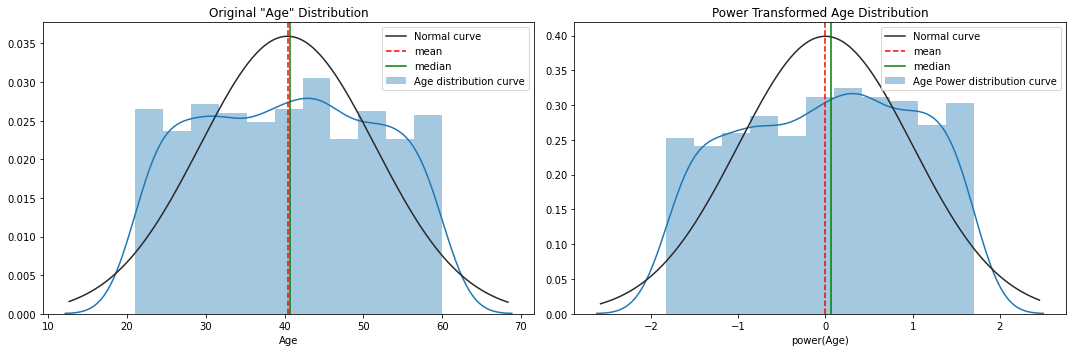

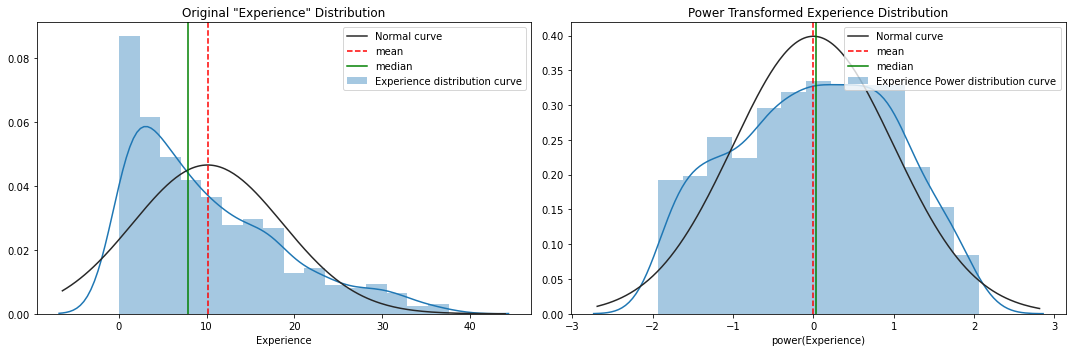

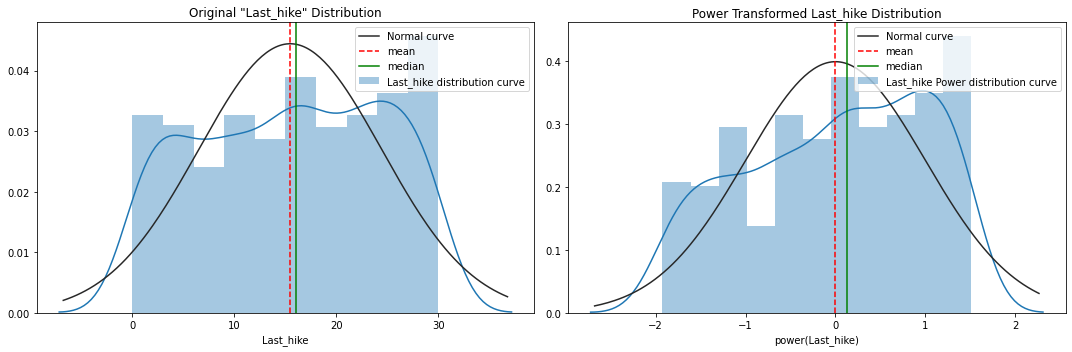

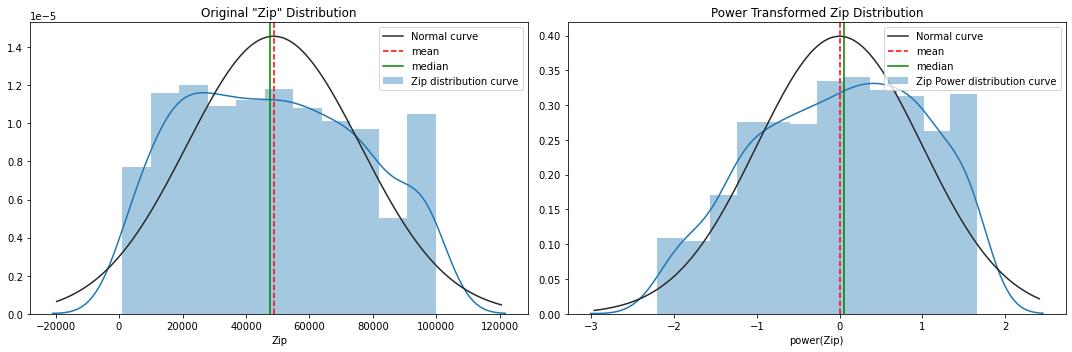

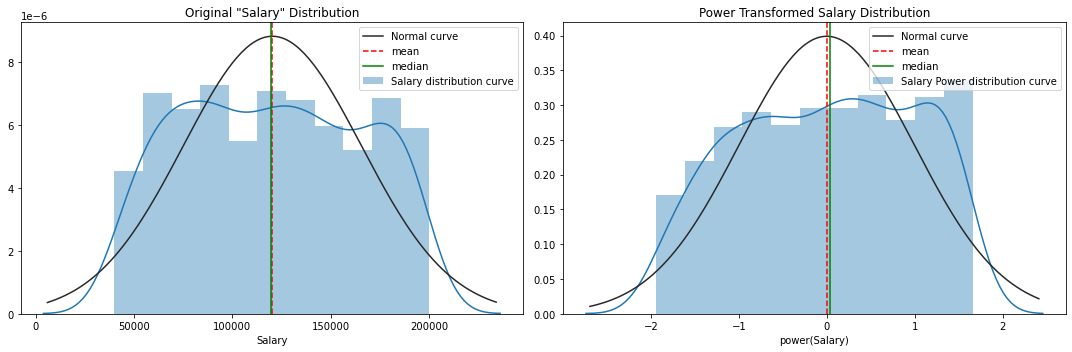

In [270]:
cols = ['Age','Experience', 'Last_hike','Zip','Salary']

for col in cols:
    # the dist_plat can plot Power, log and Sqrt transformations 
    # provide the transformations in the list ['power','log','sqrt']
    dist_plot(data, col, ['power'])

Observations:

1. I have plotted Mean and median to understand visually if the data is skewed
2. The following variables are close to Normal distribution:
    Age, Zip and Salary.
3. The "Experience" variable is right skewed. Power Transformation is able to correct the skewness.
4. Last_hike variable is very slightly left skewed. It will be further investigated.
5. The power transformation does not affect much for the variables that are close to normal distribution. so it might be ok to transform all variable using PowerTransformation instead of just Experience variable if need be.

Further investigating the Skewness

In [272]:
data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Age,0.006173,-1.157666
Joining_year,-0.958797,0.236806
Experience,0.968211,0.252943
Last_hike,-0.093021,-1.190596
Zip,0.147698,-1.037666
Salary,0.034356,-1.170441


Observations:

1. We can see the 'Experience' and 'Joining_year' are both showing moderate skewness.
2. We can also notice that 'Experience' and 'Joining_year' are almost equally skewed on opposite sides. Another reason to investigate if they are correlated to each other.

### Bivariate analysis

In [273]:
data.columns

Index(['Gender', 'Age', 'Joining_quarter', 'Joining_half', 'Joining_year',
       'Experience', 'Last_hike', 'State', 'Zip', 'Region', 'Salary', 'hikes'],
      dtype='object')

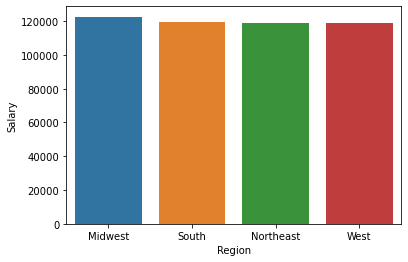

In [275]:
df = pd.pivot_table(data, index = 'Region', values = 'Salary').sort_values(by=['Salary'], ascending=False)
sns.barplot(df.index, df['Salary'])

In [154]:
pd.pivot_table(data, index = 'Region', values = 'Salary').sort_values(by=['Salary'], ascending=False)

,Salary
Region,
Midwest,122633.645614
South,119731.595687
Northeast,118978.379121
West,118910.197531


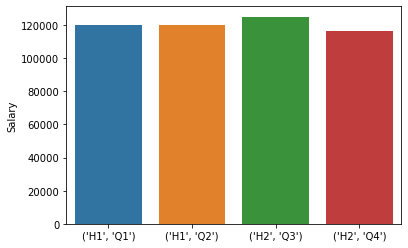

In [278]:
df = pd.pivot_table(data, index = ['Joining_half','Joining_quarter'], values = 'Salary')
sns.barplot(df.index, df['Salary'])

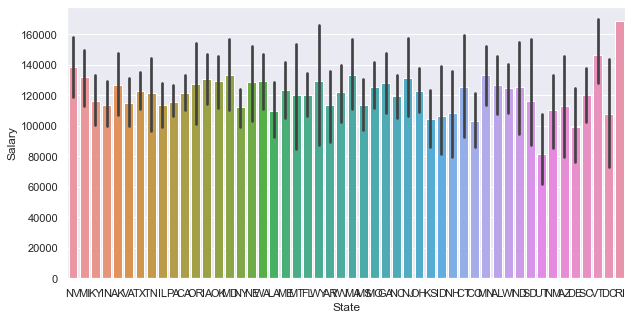

In [125]:
sns.barplot(x='State', y='Salary', data=data)

In [158]:
from sklearn.linear_model import LogisticRegression

In [173]:
data.columns

Index(['Gender', 'Age', 'Joining_quarter', 'Joining_half', 'Joining_year',
       'Experience', 'Last_hike', 'County', 'City', 'State', 'Zip', 'Region',
       'Salary'],
      dtype='object')

In [187]:
pt= PowerTransformer(standardize=True)
s = pt.fit_transform(data[['Salary']])

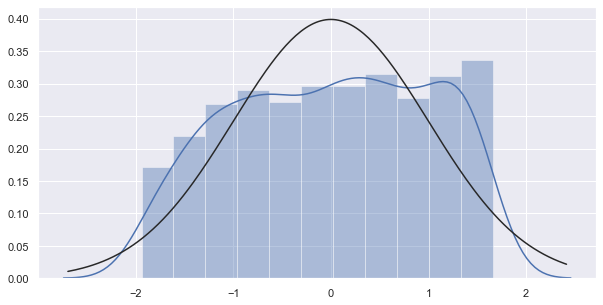

In [188]:
sns.distplot(s, fit=norm)

In [223]:
for col in data[['Gender','Joining_quarter', 'Joining_half', 'Joining_year','Last_hike', 'County', 'City', 'State', 'Zip', 'Region']].columns:
    X= data[['Salary']]
    y = data[col]
    lr = LogisticRegression()
    lr.fit(X,y)
    print(f'Score for {col} is : {lr.score(X,y)}')
    print('Summary:',lr.get_params())

Score for Gender is : 0.509
Summary: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Score for Joining_quarter is : 0.276
Summary: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Score for Joining_half is : 0.519
Summary: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Score for Joining_year is : 0.085
Summary: 

Gender


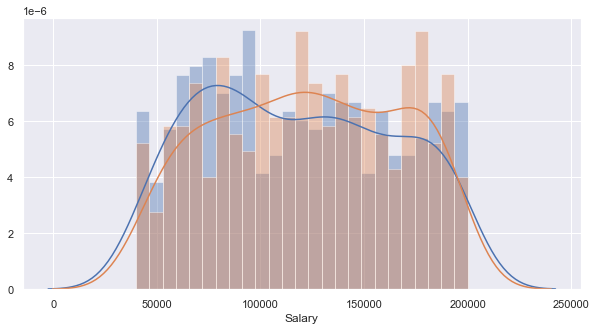

Joining_quarter


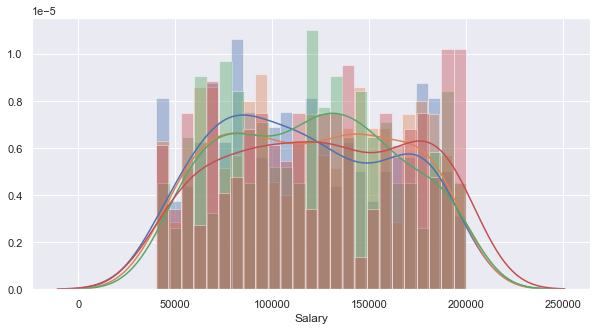

Joining_half


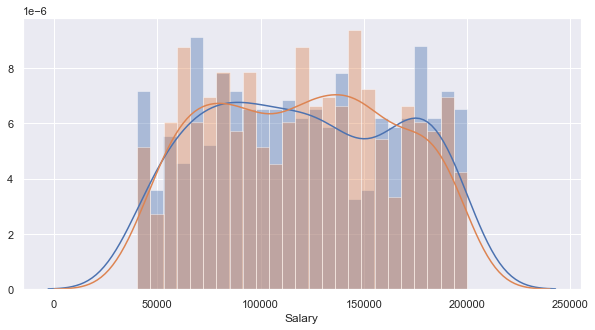

Joining_year


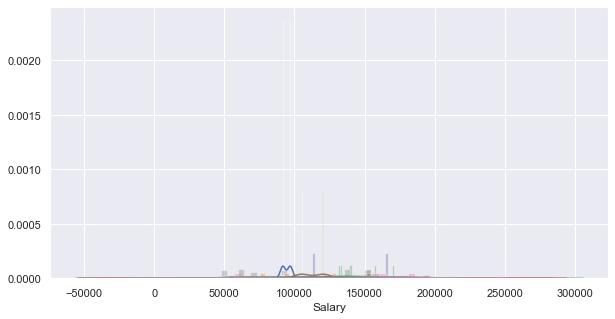

Last_hike


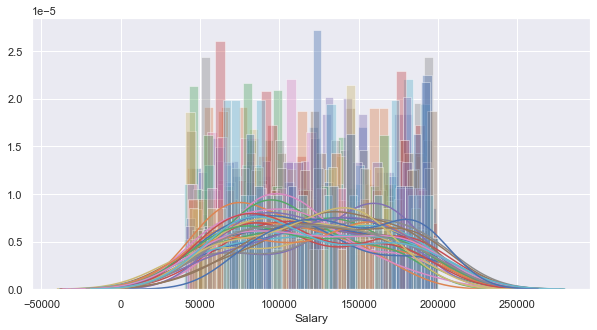

County


X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

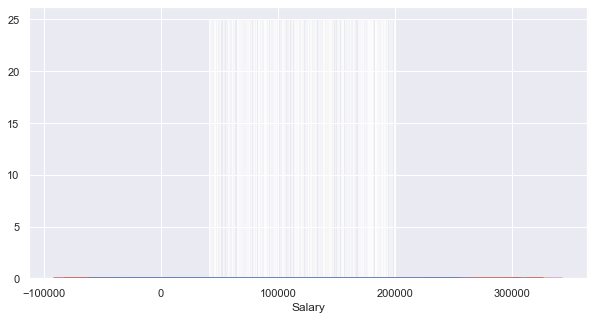

City


X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

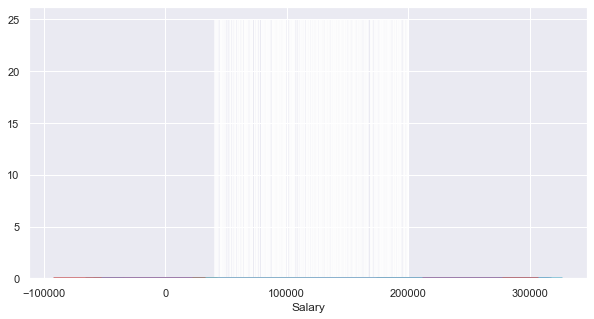

State


X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


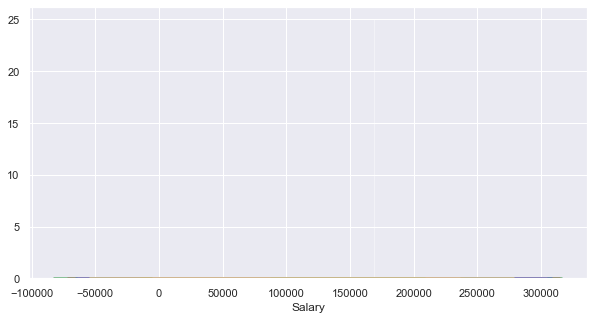

Zip


X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

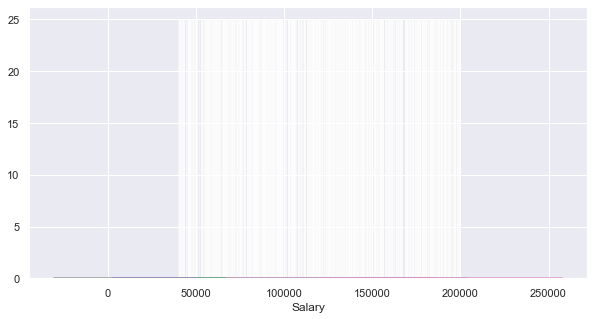

Region


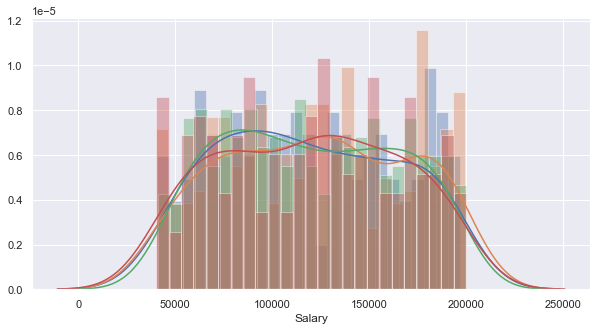

In [194]:
for col in data[['Gender','Joining_quarter', 'Joining_half', 'Joining_year','Last_hike', 'County', 'City', 'State', 'Zip', 'Region']].columns:
    print(col)
    for i in data[col].unique():
        sns.distplot(data[data[col]==i]['Salary'], bins=25,kde=True)
    plt.show()

In [226]:
from scipy.stats import f_oneway,kruskal,pointbiserialr
print(f_oneway(data[data['Joining_half']=='H1']['Salary'],data[data['Joining_half']=='H2']['Salary']))
print(kruskal(data[data['Gender']=='M']['Salary'],data[data['Gender']=='F']['Salary']))
g = data['Gender'].apply(lambda x : 0 if x == 'M' else 1)
print(pointbiserialr(g,data['Salary']))

F_onewayResult(statistic=0.035882932827741146, pvalue=0.8497959693149768)
KruskalResult(statistic=2.63452017340059, pvalue=0.10456364708802733)
PointbiserialrResult(correlation=-0.050883065768531154, pvalue=0.10781479429226405)


In [213]:
data['Salary'].var()

2041082397.5247378

In [219]:
data[data['Joining_half']=='H1']['Salary'].var() / data['Salary'].var()

0.9521459761461376

In [220]:
data[data['Joining_half']=='H2']['Salary'].var() / data['Salary'].var()

1.0536509724167575

In [ ]:
for col in data[['Gender','Joining_quarter', 'Joining_half', 'Joining_year','Last_hike', 'County', 'City', 'State', 'Zip', 'Region']].columns:
    f,p = f_oneway(df[df[col]==1][col],df[df['Class']==2][col],df[df['Class']==3][col])
    if p <= 0.05:
        print(f'The means of Classes 1, 2 and 3 for "{col}" variable are \033[1m significantly different \033[0m.')
    else:
        print(f'The means of Classes 1, 2 and 3 for "{col}" variable are \033[1m Not significantly different \033[0m.')


In [ ]:
sns.set(rc={"figure.figsize": (10, 5)})


for col in df.drop(['Class'], axis=1).columns:    
    for i in df['Class'].unique():
        plt.title(f'Normal distribution of {col} for Classes 1,2 and 3')
        sns.distplot(df[df['Class']==i][col], bins=25,kde=True)
    plt.legend([1,2,3])
    plt.show()

In [50]:
pt = PowerTransformer()
data['Salary']=pt.fit_transform(data[['Salary']])

In [51]:
data.Salary

0      0.030584
1      0.006567
2      0.905676
3      0.530541
4      0.386340
         ...   
995   -1.045159
996    0.092766
997   -0.803278
998   -1.199758
999   -0.280878
Name: Salary, Length: 1000, dtype: float64

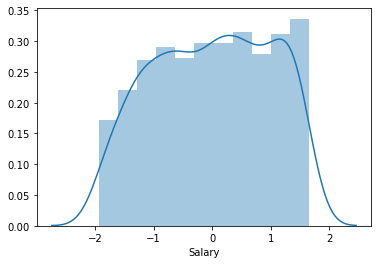

In [52]:
sns.distplot(data['Salary'])

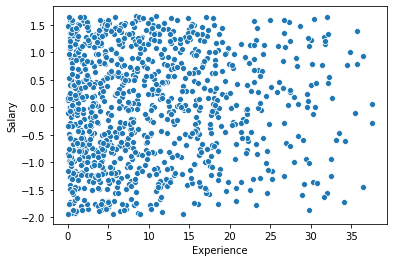

In [53]:
sns.scatterplot(data['Experience'], data['Salary'])

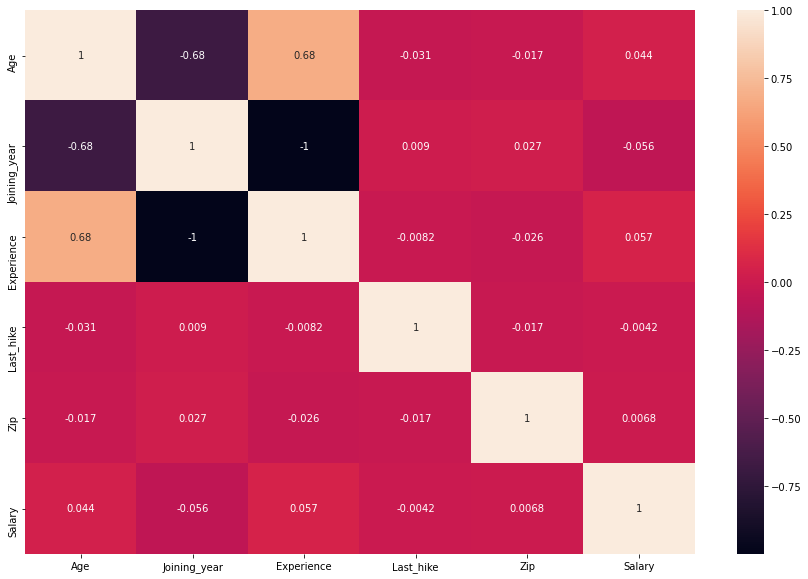

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

Strong Multicollinearity between Experience and Joining year - Remove Joining_year

Multicollinearity between Experience and Age - Remove Age
